In [237]:
import tensorflow
import numpy
import cv2
import matplotlib.pyplot as plt

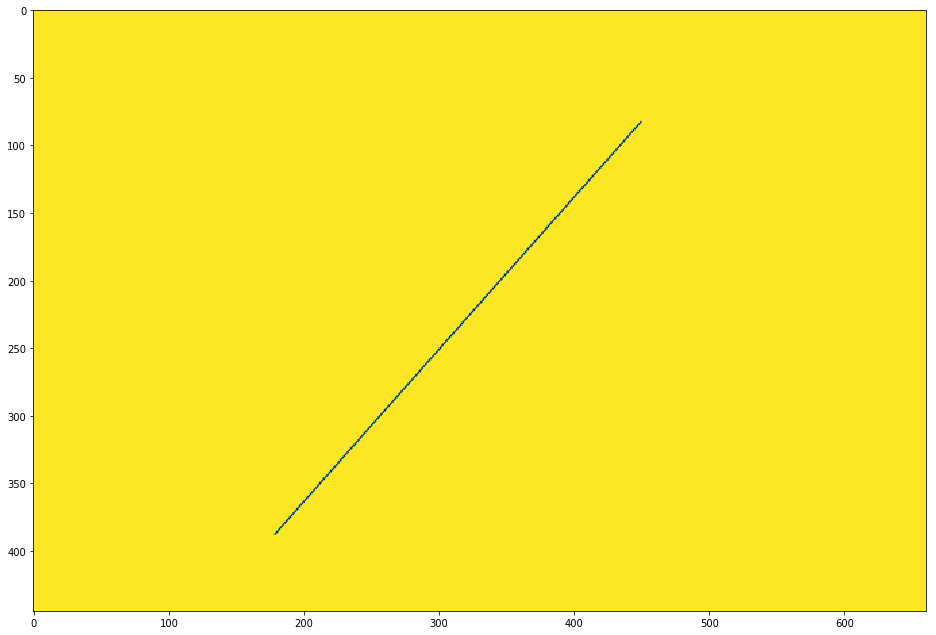

In [238]:
file = 'assets/line.png'
image = cv2.imread(file, cv2.CV_8UC1)
plt.figure(figsize=[16,16])
plt.imshow(image)

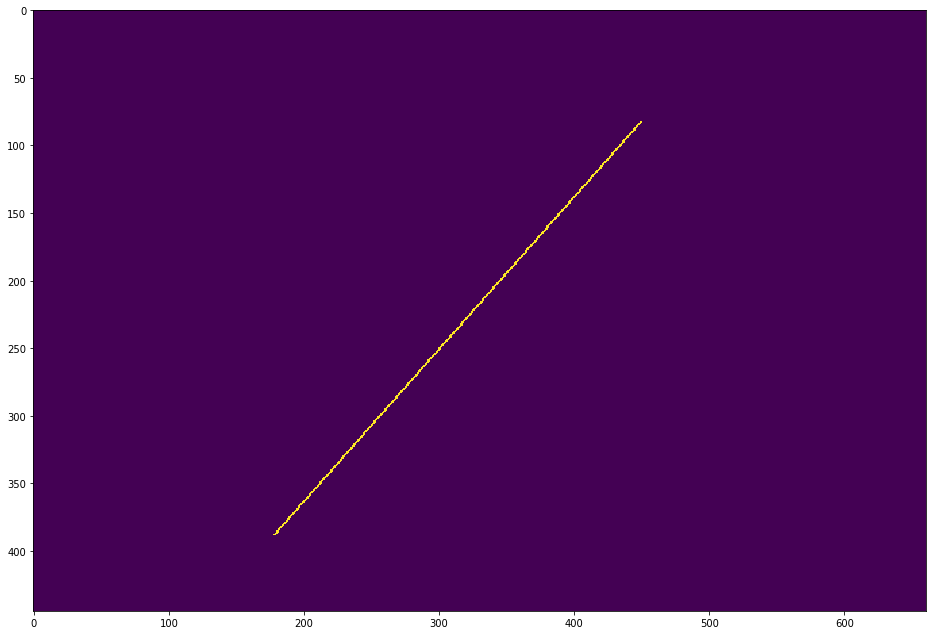

In [239]:
# cv2.threshold(input image, thresh, max, flag)
_, bt = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=[16,16])
plt.imshow(bt)

445 661
(330, 222) -48.0976910422052 [[   0.66786255   -0.74428463  274.836547  ]
 [   0.74428463    0.66786255 -171.87941486]]


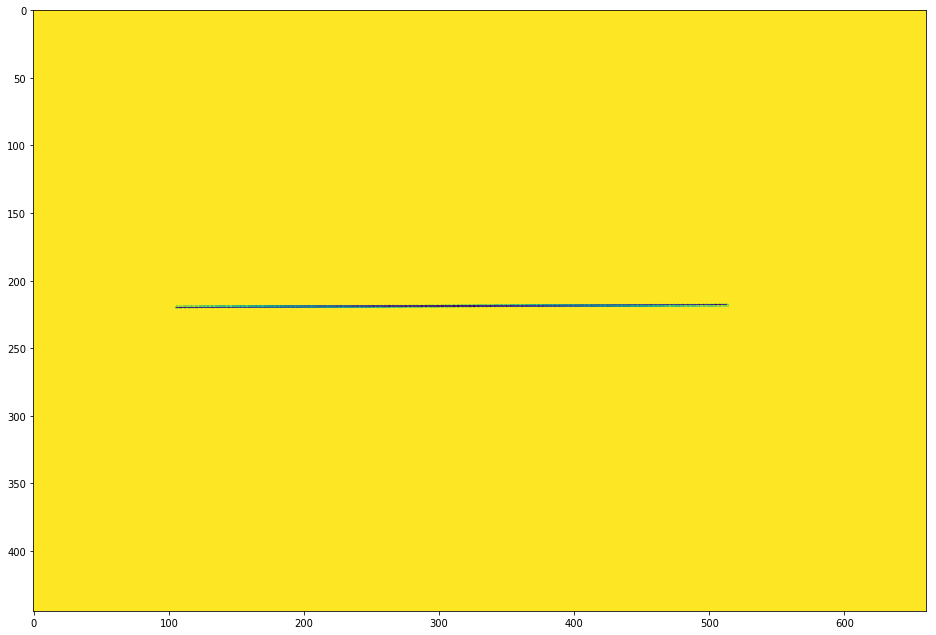

In [240]:
# houghlinesp (binary image, rho resolution, theta resolution, thresh, minlinelength, maxlingap)
lines = cv2.HoughLinesP(bt, 1, numpy.pi/180, 150, minLineLength= 100/2.0, maxLineGap=20)
angle = 0
for line in lines:
    x1, y1, x2, y2 = line[0]
    r = numpy.arctan2(y2 - y1, x2 - x1)
    angle += numpy.arctan2(y2 - y1, x2 - x1)
avg_radian = angle / len(lines)
avg_angle = avg_radian * 180 / numpy.pi

(h, w) = image.shape
center = (w // 2, h // 2)
matrix = cv2.b(center, avg_angle, 1)
cv2.warpAffine(image,matrix,(w, h),dst,flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)

plt.figure(figsize=[16,16])
plt.imshow(dst)